In [216]:
from scipy.stats import uniform
import numpy as np;
import matplotlib.pyplot as plt

In [217]:
#  Моделируем единичные показания манометра для некоторого наперед выбранного значения физической величины

low=0;    #  нижний предел измерений манометра
high=10;  #  верхний предел измерений манометра
kt=1.5;   #  класс точности манометра
abs_error = (right - left) / 100 * kt; #  абсолютная погрешность измерений
abs_var=abs_error/2; #  допустимая вариация показаний
X=5;      #  опорное значение физической величины
units="МПа"

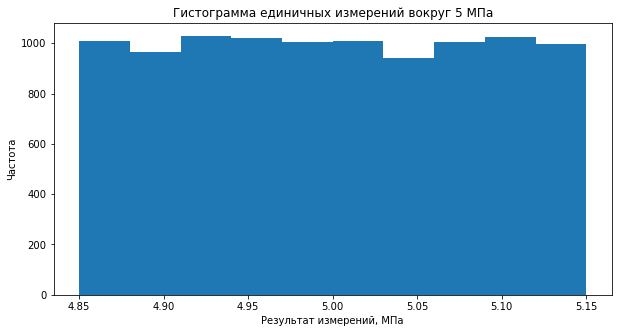

In [218]:
#  Генерируются числа в интервале нижняя граница которого X-abs_error и ширина abs_error * 2
count=10000;  #  количество моделируемых точек
points = uniform.rvs(loc=X-abs_error,scale=abs_error*2,size=count); #  сгенерированные точки
plt.figure(figsize=(10,5));
plt.hist(points);
plt.title(f"Гистограмма единичных измерений вокруг {X} {units}");
plt.xlabel(f"Результат измерений, {units}");
plt.ylabel(f"Частота");
plt.show();

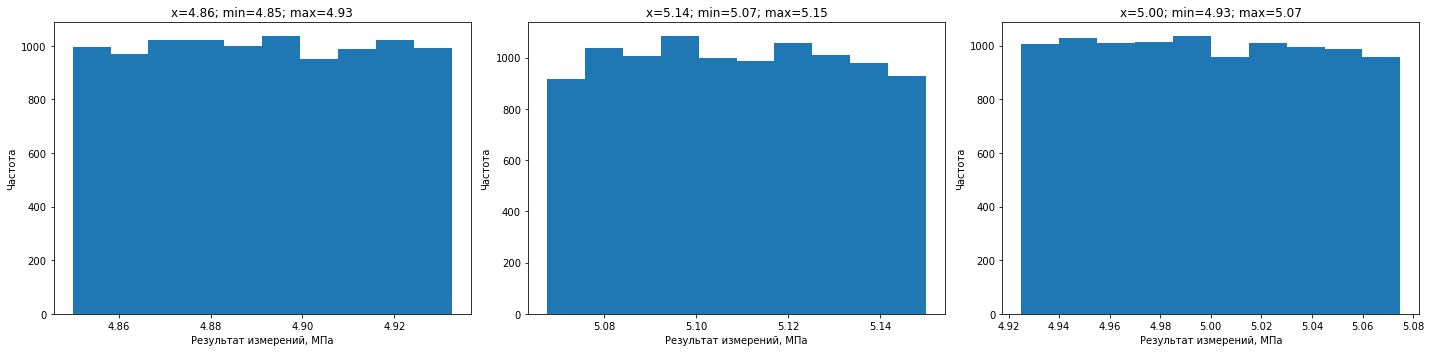

In [219]:
#  положения первого измерения: у границ и по центру
centers=[X-abs_error + 0.1 * abs_var,X+abs_error - 0.1 * abs_var,X];
# границы второго измерения с учетом вариации
borders=[ (max(x-abs_var,X-abs_error),min(x+abs_var,X+abs_error)) for x in centers  ];
#  результаты моделирования
points=[  uniform.rvs(loc=x[0],scale=(x[1]-x[0]),size=count) for x in borders  ];
fig,axs = plt.subplots(1, len(points),figsize=(20,5));
#fig=plt.figure(figsize=(10,10));
#fig.figsize=(10,10);
for i in range(len(points)):
    axs[i].hist(points[i]);
    axs[i].set_title(f"x={centers[i]:#.2f}; min={points[i].min():#.2f}; max={points[i].max():#.2f}");
    axs[i].set_xlabel(f"Результат измерений, {units}");
    axs[i].set_ylabel(f"Частота");
plt.tight_layout();    
plt.show();